# Assigment 3 | Applied Machine Learning | Paras Ahuja

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Questions

### 1. Due to the severity of this real-world crisis, what information would be the most important one to "machine learn"? Can it be learned?

Socio-economic factors and pre-existing conditions are two variables that can be studied. For instance, Oakville, Ontario, Canada is an upscale suburb of the Greater Toronto Area, with an average household income of 188,997 CAD, and average house price of 1,359,124 CAD. As Ontario went through the crises, Hospitals in Oakville saw relatively fewer cases. Oakville Trafalgar Memorial Hospital had prepared their ICU ward for an influx of 60 COVID-19 patients (or those impacted by COVID-19, for instance suicide attempts), and higher should the situation get out of control. However, the hospital only saw 2-3 cases on an average. Even though it is an hour away from Toronto, which experienced far higher numbers, and so did the other suburbs. Perhaps socio-economic factors of people are at play here. However, pre-existing mental conditions can certainly take a toll, and is something worth looking into. 

Oxford University published a paper entitled "The impact of the COVID-19 pandemic on suicide rates" by Leo Sher. The paper shows the following graph, on the graph we see socio-economic factors, and pre-existing conditions as the key factors. There are obviously other variables that can be studied, if someone has a relative who died for COVID-19. Some of these variables maybe hard to obtain. We can certainly learn information about socio-economic factors, and if a person had pre-existing psychiatric issues. In some cases pre-existing conditions might be hard to study as well. Problem here is mostly data collection, and how reliable is our data. If it can be reliably obtained, then we can certainly study it. pre-exiting psychiatric conditions will allow us to create a binary label 1 for yes, 0 for no. Socio-economic factors can be obtained as the level of income of a person. Overall we can create a machine learning model, even if not everything can be studied. 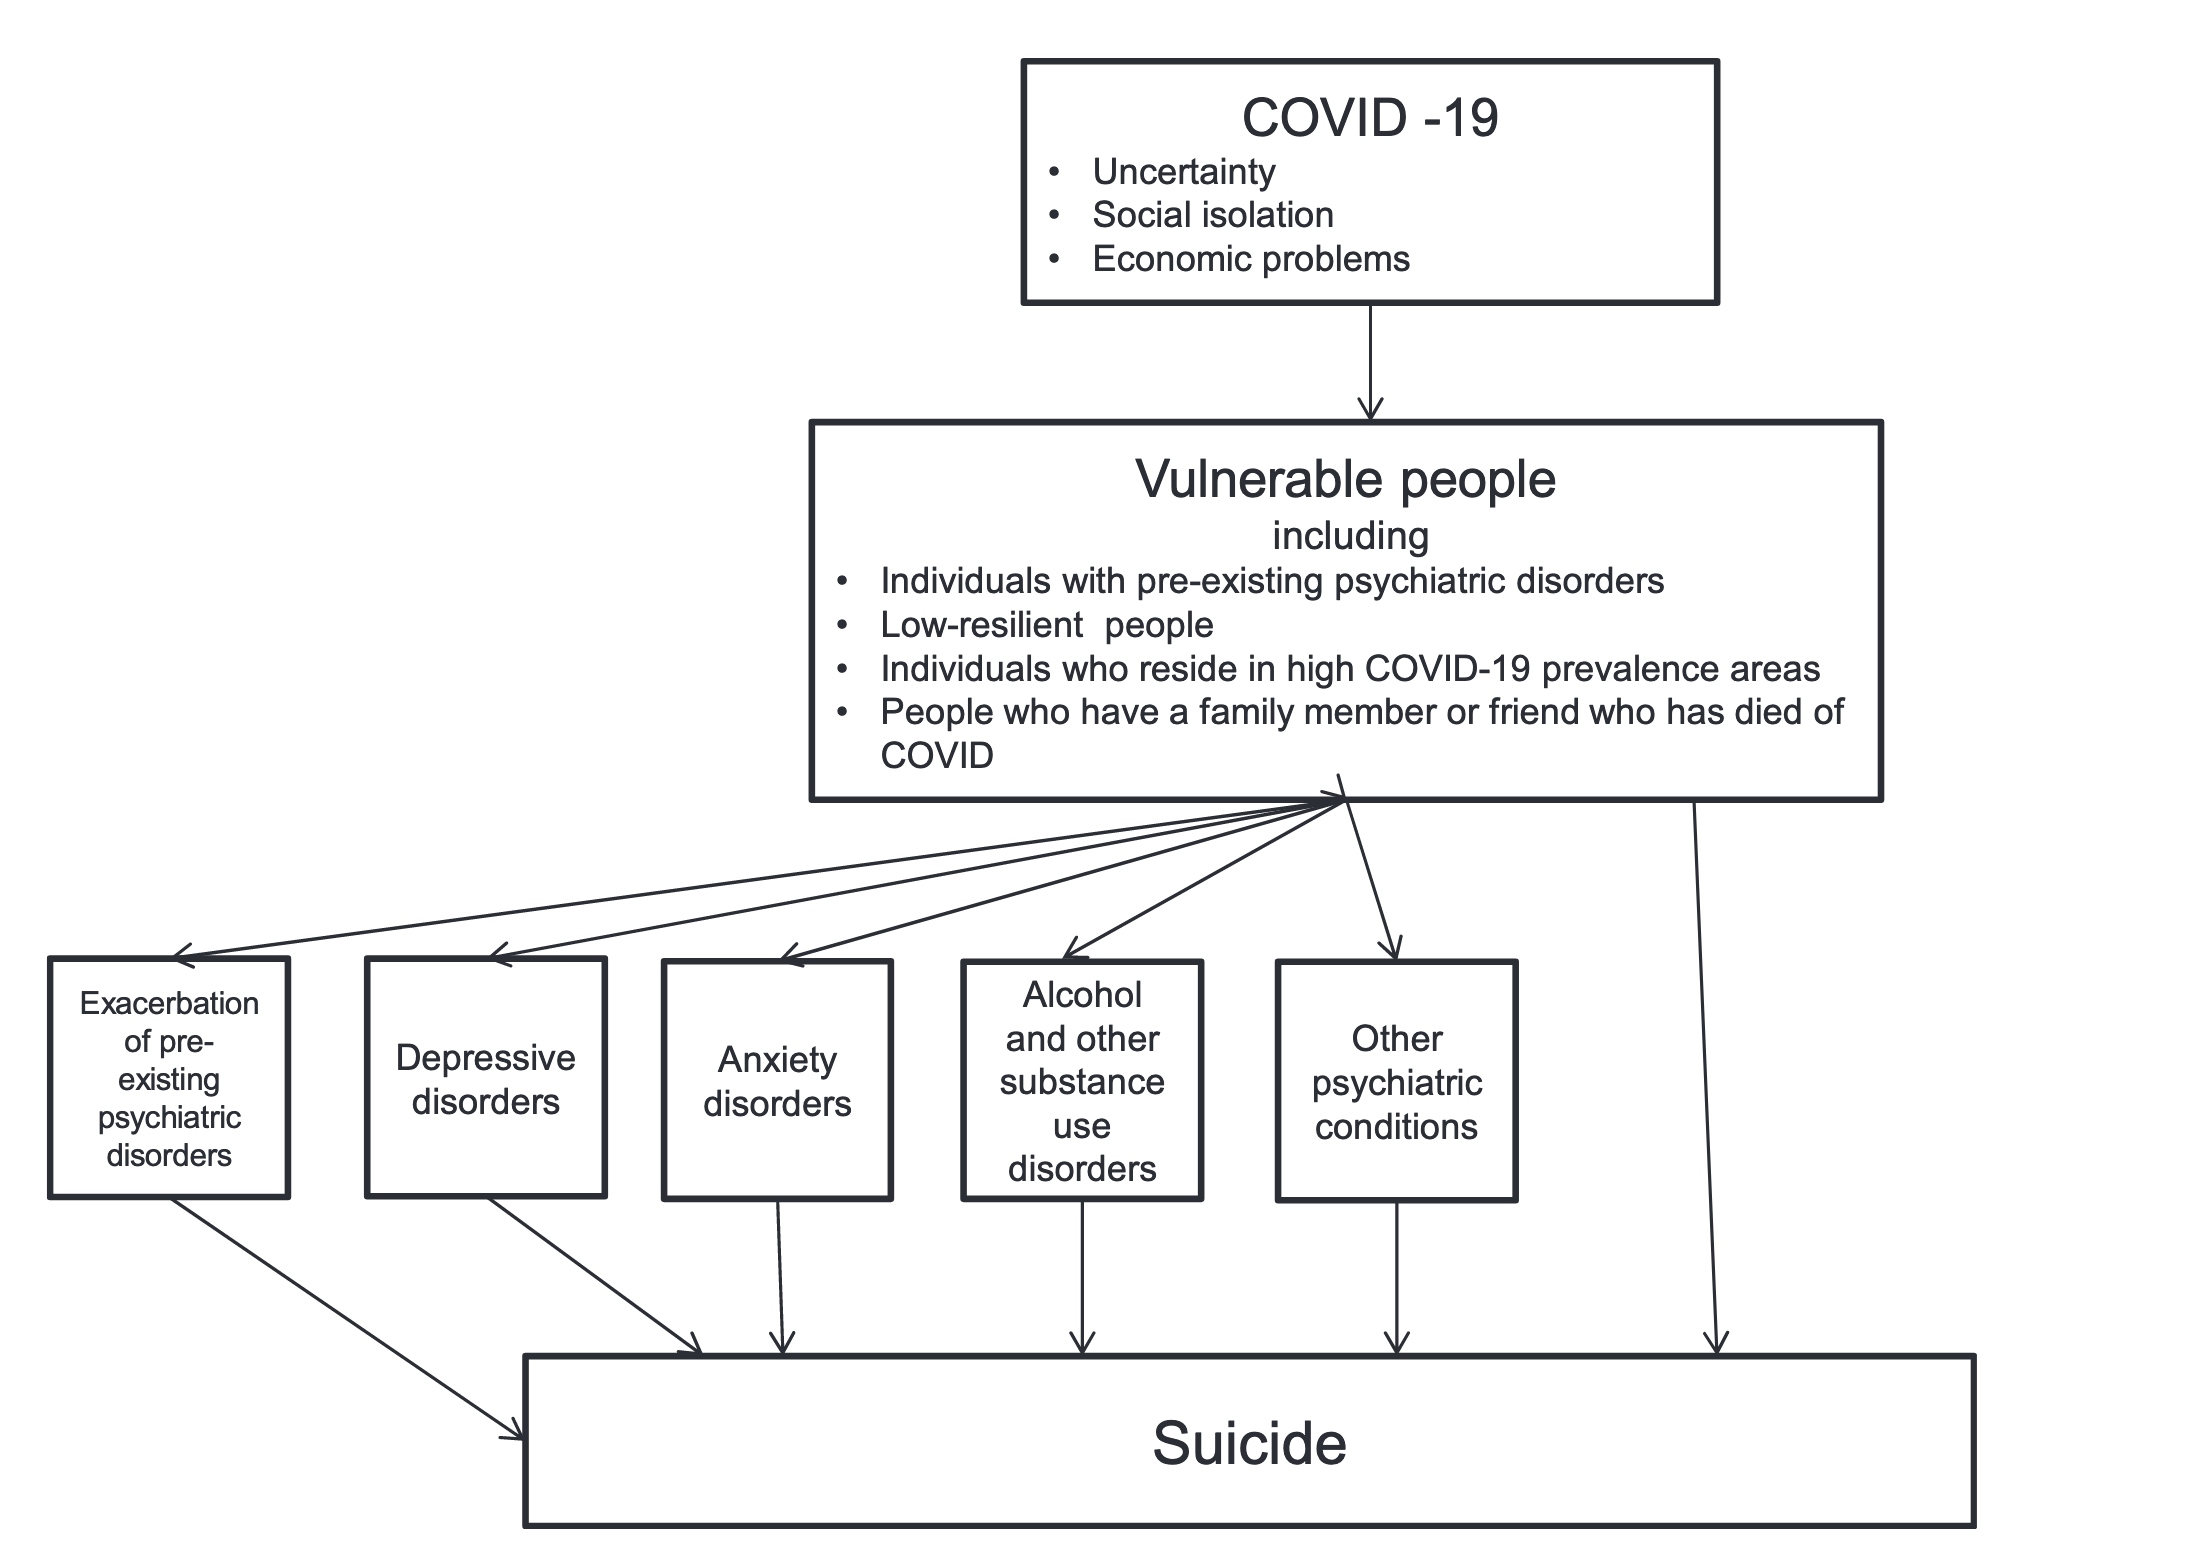

### 2. Explain in detail how one should setup the problem? Would it be a regression or a classification problem? Any unsupervised approach to see some patterns exist or not?

In order to setup the problem one should first understand the data. This is different from saying that one should be be an expert in each feature. The least one can do before setting up the problem is to look at the data, understand why the data might be important. Get the feel for how the data is organized. After looking at the data, we should seek to impute missing values. This could either be based on mean, median, or mode. We should also understand if there any missing values, or any duplicates. Decide whether we are satisfied with the datatypes, and the instances we have left after cleaning the data. 

After we have cleaned the data, we need to ask an important question, which is what we are trying to study or understand from the data. How many features are there, are all the features needed - determined by our end goal for the data. For instance, are we interested in predicting the number of suicides/100k pop? If so then we are dealing with a regression problem. If we are interested in finding out if suicides/100k pop is high or low, this becomes a classification problem. Furthermore, if we are working on this dataset on behalf of a customer/employer, then the problem statement needs to be discovered during the meetings, and it is then should we decide whether or not if we are dealing with regression or classification. Therefore, it depends on how the end goal. However, for the purposes of this assignment we treat the problem as a classification problem. 

If we know that we numeric data, we can use KMeans clustering to see how the data clusters. When we use KMeans clustering each cluster refers to a collection of data points aggregated together because of certain similarities. KMeans clustering has the following advantages: 

* Relatively simple to implement.

* Scales to large data sets.

* Guarantees convergence.

* Can warm-start the positions of centroids.

* Easily adapts to new examples.

* Generalizes to clusters of different shapes and sizes, such as elliptical clusters.

In [2]:
df = pd.read_csv("../Applied Machine Learning/Module 3 Assignment/master.csv", thousands=',')
examples, features = df.shape[0], df.shape[1]
print("Number of Examples: {}\nNumber of Features: {}".format(examples, features))
df.head()

Number of Examples: 27820
Number of Features: 12


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


We notice that there are 12 features and 27,820 examples in the dataset. However, HDI for year seems to contain NaNs. We need to check for NaNs values in our dataset. We would also like some information about the features, and their types.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  int64  
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


We notice that while we have some data in int64 or float64 format, rest of the data is object type. gdp_for_year is an important number because it indicates a nation's standing in the world. Larger GDP generally, but not always, means the country is growing. Next we analyze few features to find out some information about the dataset.

### Country

In [4]:
df["country"].describe()

count         27820
unique          101
top       Mauritius
freq            382
Name: country, dtype: object

It appears that Iceland is mentioned most frequently in our dataset. It has 382 instances, and there 101 unique values, which means 101 countries where we only have a single instance of data. Let's find out, which country has the highest number of people committing suicide per 100k.

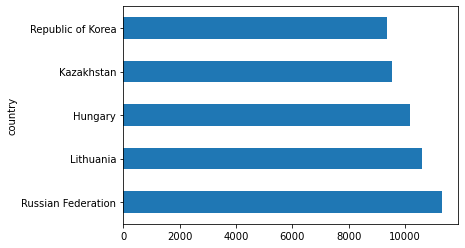

In [5]:
plot = df.groupby(['country'])["suicides/100k pop"].sum().nlargest(5).plot(kind="barh")

The graph above shows 5 countries with highest number of suicides per 100,000 population. We notice that Russian Federation has the highest number of suicides per 100,000 population. 

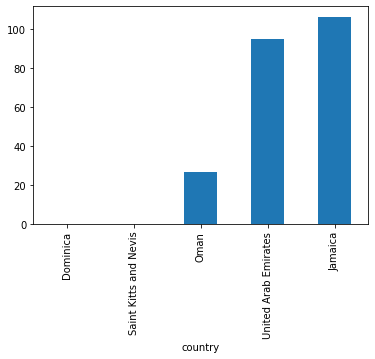

In [6]:
plot = df.groupby(['country'])["suicides/100k pop"].sum().nsmallest(5).plot(kind="bar")

We notice here that Dominica, Saint Kitts and Nevis are the countries with 0 suicides per 100,000 population but this could be due to lack of reporting or information available. Lowest country on our list is Oman.

### Year
We are most interested in finding out the year when most of the suicides occurred to help us with our analysis. 

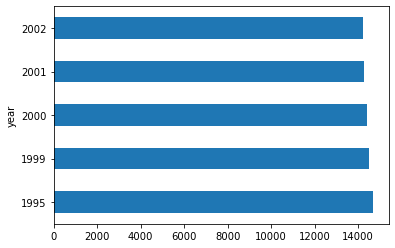

In [7]:
plot = df.groupby(["year"])["suicides/100k pop"].sum().nlargest(5).plot(kind="barh")

We notice here that 1995 was not a great year in general. It is certainly possible that this could be due to the financial and economic turmoil during the 90s. EU was formed around the same time, world was going through currency crises, as well as the Tequila crises.

### Sex

Research indicates that men are most likely to commit suicide than women, let's check if our data supports this.

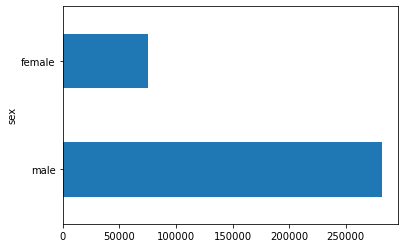

In [8]:
plot = df.groupby(["sex"])["suicides/100k pop"].sum().nlargest(2).plot(kind="barh")

This is indeed the case! Men committed suicide more often than women. Nearly 3 times as much from what we can tell by looking at the graph.

### Age

Let's check which age group is most likely to commit suicide per 100,000 of population.

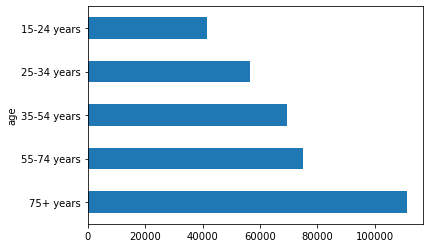

In [9]:
plot = df.groupby(["age"])["suicides/100k pop"].sum().nlargest(5).plot(kind="barh")

It appears that our senior citizens are most at risk. Perhaps more attention to their mental well being will prove to be of help? Dr. Atul Gawande mentions in his book entitled "Being Mortal", that senior citizens are most often lonely and feel ignored by the society and their loved ones.

### What should be the dependent variable?

Dependent variable is the one we are trying to predict. In this instance let say that we want to find out if suicides/100k pop is high or low. We can first get some statistics about the target variable, and then we can discretize the variable. We have to do this because we do not have a binary classification problem. We are finding out what the target should be and proceeding accordingly. Let's see what the histogram looks like.

### Rank the variables to find some strong correlations between the independent variables and the dependent variable you decided.

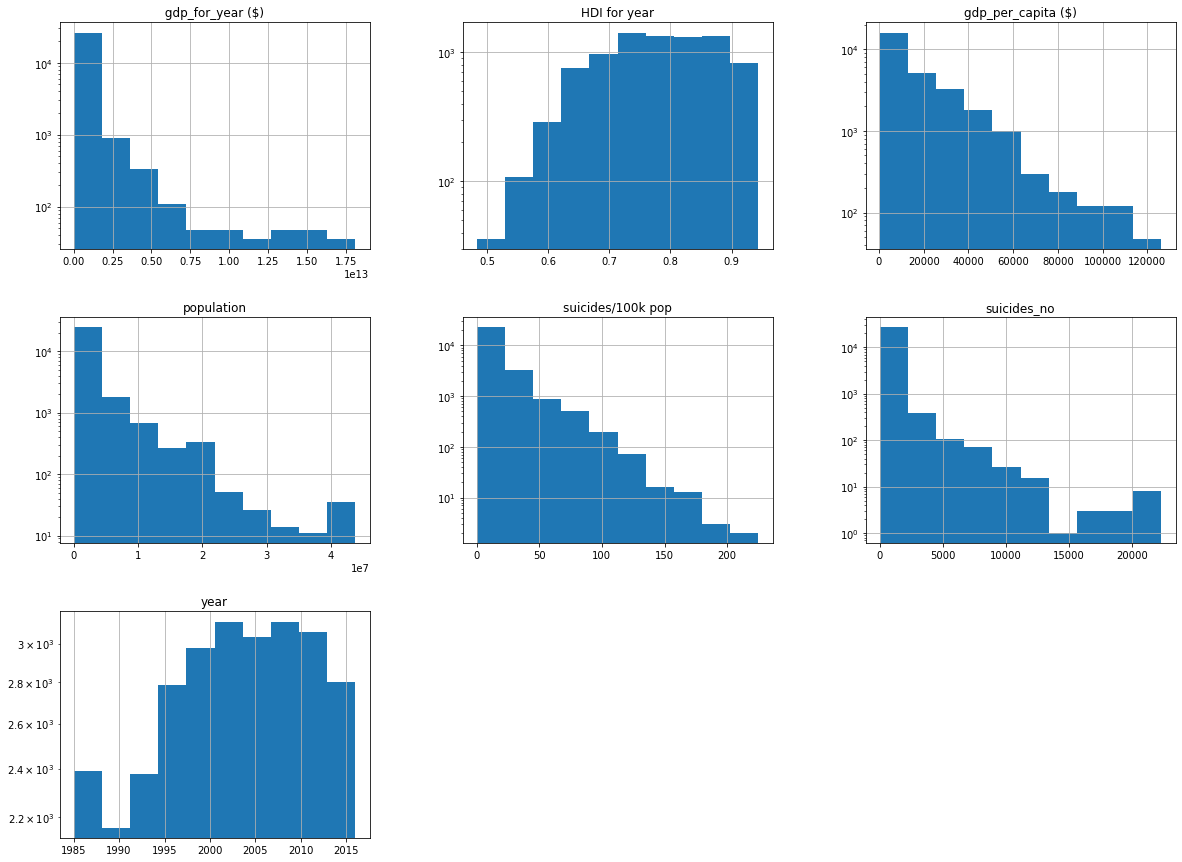

In [10]:
df.hist(log=True, bins=10, figsize=(20,15))
plt.show()

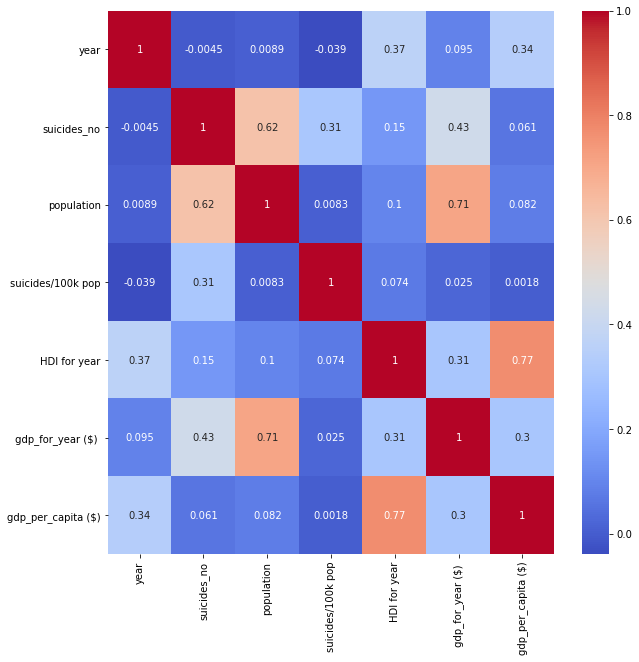

In [11]:
f,ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

Since we are using suicides/100k pop as our target variable, we notice there is low correlation with year, population, gdp per capita. This will allow us to drop the low correlation variables and continue with the variables that do provide us some information. Notice that suicides/100k pop does have a somewhat higher correlation with HDI, but we do have some missing instances of this feature. Following are the features ranked highest correlation to lowest.

1. suicides_no
2. HDI for year
3. gdp_for_year (\$)
4. population
5. gdp_per_capital(\$)
6. year

Let's continue with our data-preprocessing.

## Pre-process the dataset and list the major features you want to use. Note that not all features are crucial. For example, country-year variable is a derived feature and for a classifier it would not be necessary to include the year, the country and the country-year together. In fact, one must avoid adding a derived feature and the original at the same time.

In [12]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


Let's first find out what is going on with HDI feature. There may be other features that also have missing values. We need to find out how many in total are missing.

In [13]:
df.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

We notice that there are 19,456 instances where we do not have a value for HDI for year. HDI for year is Human Development Index. United Nations states the following about HDI: 

"*The HDI was created to emphasize that people and their capabilities should be the ultimate criteria for assessing the development of a country, not economic growth alone. The HDI can also be used to question national policy choices, asking how two countries with the same level of GNI per capita can end up with different human development outcomes. These contrasts can stimulate debate about government policy priorities.
The Human Development Index (HDI) is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and have a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions.*"

Since there are too many values missing, we can simply drop the entire feature from our analysis because we do not have any sound way of imputing these values. We also don't need country-year feature. Let's drop these features.

In [14]:
df = df.drop(columns=["HDI for year", "country-year"])
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers


We need to change a few things here. Firstly generation is a nominal variable, and we can use numbers to represent this information. In our analysis we will not consider every feature. We will transform some and drop others. For instance, for age group we will take the mean of the two numbers and round it to the nearest integer. Furthermore, we need to find out some information about our target variable.

In [15]:
y_mean = df["suicides/100k pop"].mean()
y_std = df["suicides/100k pop"].std()
print("Mean: {}\nStandard Deviation: {}".format(round(y_mean, 3), round(y_std, 3)))

Mean: 12.816
Standard Deviation: 18.962


We notice here that the mean is 12.816, and the standard deviation is 18.961

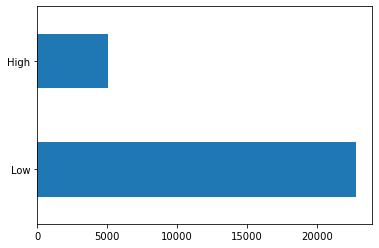

In [16]:
target = pd.cut(df["suicides/100k pop"], bins=[np.NINF, (y_mean+0.5*y_std), np.Infinity], labels=["Low", "High"])
plot = target.value_counts().plot(kind="barh")

In [17]:
df['age'] = df['age'].map({'15-24 years': 20, '35-54 years': 45, '25-34 years': 30, '5-14 years': 10, '75+ years': 75, '55-74 years': 65})
df['generation'] = df['generation'].map({'Generation X': 1, 'Silent': 2, 'G.I. Generation': 3, 'Boomers': 4, 'Millenials': 5, 'Generation Z': 6})
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['target'] = target
df['target'] = df['target'].map({'Low': 0, 'High': 1})
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,target
0,Albania,1987,1,20,21,312900,6.71,2156624900,796,1,0
1,Albania,1987,1,45,16,308000,5.19,2156624900,796,2,0
2,Albania,1987,0,20,14,289700,4.83,2156624900,796,1,0
3,Albania,1987,1,75,1,21800,4.59,2156624900,796,3,0
4,Albania,1987,1,30,9,274300,3.28,2156624900,796,4,0


We can drop a few more columns.

In [18]:
df = df.drop(columns=["country", "population", "suicides_no"])
df.head()

,year,sex,age,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,target
0,1987,1,20,6.71,2156624900,796,1,0
1,1987,1,45,5.19,2156624900,796,2,0
2,1987,0,20,4.83,2156624900,796,1,0
3,1987,1,75,4.59,2156624900,796,3,0
4,1987,1,30,3.28,2156624900,796,4,0


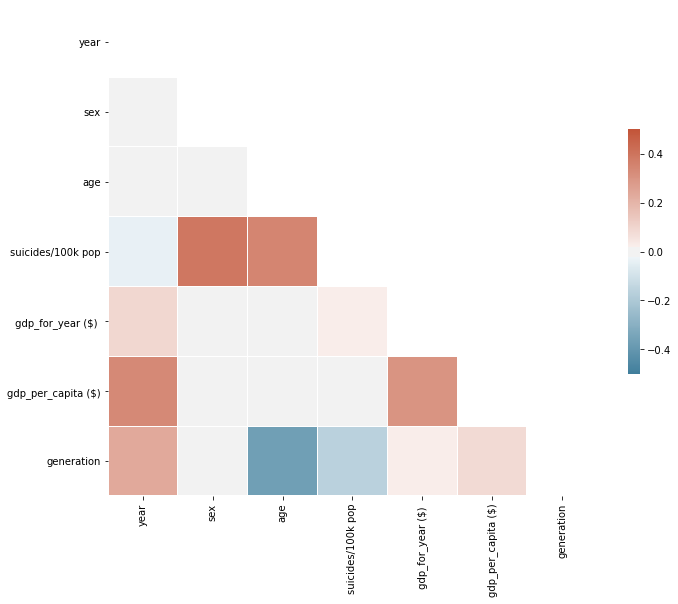

In [19]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plot = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.5, vmin=-0.5, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

Although we can probably take out a few more features, but at this point we should settle for what we have.

In [20]:
df.columns

Index(['year', 'sex', 'age', 'suicides/100k pop', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation', 'target'],
      dtype='object')

### Devise a classification problem and present a prototype model. Note that we will continue to this problem in the following modules.

In [21]:
y = df["target"]
df_copy = df.drop(columns="target")
X = df_copy.loc[:, df_copy.columns != "suicide/100k pop"].values
y = target.values
le = LabelEncoder()
y = le.fit_transform(y)

In [22]:
def classifier(clf, X, y, f1=True, splits=5, shuffle=True):
    score = []
    kfold = StratifiedKFold(n_splits=splits, shuffle=shuffle, random_state=None)
    for train_index, test_index in kfold.split(X, y):
        clf.fit(X[train_index], y[train_index])
        y_pred = clf.predict(X[test_index])
        if f1:
            score += [f1_score(y[test_index], y_pred)]
        else: 
            score += [accuracy_score(y[test_index], y_pred)]
    return np.array(score)

In [23]:
nb = classifier(GaussianNB(), X, y)
print("Naive Bayes CV Mean F1 Score:{}\nNaive Bayes CV Standard Deviation F1 Score:{}".format(round(np.mean(nb), 3), np.std(nb)))

Naive Bayes CV Mean F1 Score:0.895
Naive Bayes CV Standard Deviation F1 Score:0.0011912760858345832


In [24]:
rf = classifier(RandomForestClassifier(n_estimators=200, max_depth=5, random_state=None, n_jobs=4), X, y)
print("Random Forest CV Mean F1 Score:{}\nRandom Forest CV Standard Deviation F1 Score:{}".format(round(np.mean(rf), 3), np.std(rf)))

Random Forest CV Mean F1 Score:1.0
Random Forest CV Standard Deviation F1 Score:4.3893339185796516e-05
